# Step 1

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pycaret.classification import *
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 2

In [2]:
# Load the Data
df = pd.read_csv(Path("Resources/healthcare-dataset-stroke-data.csv"))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Step 3: Data Analysis

In [3]:
# Looking at data to better understandance
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# Check columns datatypes
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
#Checing duplicates
df.duplicated().sum()

0

In [6]:
#dataset info before droping values
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print('Missing values per column:')
print(df.isnull().sum())

The dataset has 5110 rows and 12 columns.
Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
# Remove missing values 
df.dropna(inplace = True)

In [8]:
#dataset info after droping values
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print('Missing values per column:')
print(df.isnull().sum())

The dataset has 4909 rows and 12 columns.
Missing values per column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
# Copying dataset for future use
df_clean = df.copy()
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
#Checing values in Gender column
df_clean["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
#finding index for gender value other
other = df_clean.loc[df_clean['gender']=='Other']
other.index[0]

3116

In [12]:
#drop that value
df_clean = df_clean.drop(other.index[0])

In [13]:
#cheking that value has been dropped
df_clean["gender"].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [14]:
# Convert values for Gender Male to 1 and Female to 0
# and ever_married Yes to 1 and No to 0
df_clean['gender'] = df_clean['gender'].map({'Male': 1, 'Female': 0})
df_clean['ever_married'] = df_clean['ever_married'].map({'Yes': 1, 'No': 0})

In [15]:
# Convert values for Residence_type Urban to 1 and Rural to 0
df_clean['Residence_type'] = df_clean['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [16]:
#Checking what values are available in work types column
df_clean["work_type"].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [17]:
# Convert values for work type 
df_clean['work_type'] = df_clean['work_type'].map({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

In [18]:
#Checking what values are available in smoking status column
df_clean["smoking_status"].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [19]:
# Convert values for smoking status
df_clean['smoking_status'] = df_clean['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})

In [20]:
#copying data set for future use
df_ready = df_clean.copy()

In [21]:
#dropping column id, as it's not needed in future machine learning 
df_ready = df_ready.drop(columns=['id'])
df_ready

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
2,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,1,0,174.12,24.0,0,1
5,1,81.0,0,0,1,0,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,2,0,103.08,18.6,1,0
5106,0,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,0,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,1,51.0,0,0,1,0,0,166.29,25.6,2,0


In [22]:
#cheking values in stroke columns
df_ready["stroke"].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [23]:
#save cleaned data frame to csv
df_ready.to_csv('Resources/datacleaned.csv', index=False)

In [24]:
#scale the age, average glucose level and bmi columns
df1 = df_ready.copy()
dfy = df_ready['stroke']
df1 = df1.drop(columns="stroke")
df11 = df1[["age", "avg_glucose_level", "bmi"]]
df12 = df1.drop(columns=["age", "avg_glucose_level", "bmi"])
from sklearn import preprocessing
d = preprocessing.scale(df11)
scaled_df = pd.DataFrame(d)
scaled_df.columns = ["age","avg_glucose_level", "bmi"]
scaled_df = pd.merge(scaled_df, df12, left_index=True, right_index=True)
scaled_df = pd.merge(scaled_df, dfy, left_index=True, right_index=True)
print(scaled_df)

           age  avg_glucose_level       bmi  gender  hypertension  \
0     1.069938           2.777797  0.981145       1             0   
2     0.271847           1.484266  0.701016       1             0   
3     1.601998           1.549325 -0.623231       0             0   
4     1.690675           1.821493  0.013426       0             1   
5     1.380306          -0.792584 -0.190304       1             0   
...        ...                ...       ...     ...           ...   
4903 -1.324334          -0.049918 -1.310821       0             0   
4904  1.690675           0.448045  1.414072       0             0   
4905 -0.348890          -0.502181  0.217156       0             0   
4906  0.360524           1.373057 -0.419501       0             0   
4907  0.050155          -0.450629 -0.343102       1             0   

      heart_disease  ever_married  work_type  Residence_type  smoking_status  \
0                 1             1          0               1               2   
2          

# Step 4:

In [25]:
#setup Pycaret
clf = setup(data = scaled_df, target = 'stroke', fix_imbalance = True, session_id = 42)

,Description,Value
0,Session id,42
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4715, 11)"
4,Transformed data shape,"(7723, 11)"
5,Transformed train set shape,"(6308, 11)"
6,Transformed test set shape,"(1415, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [26]:
# Best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9558,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1330
lightgbm,Light Gradient Boosting Machine,0.9442,0.7812,0.1767,0.2882,0.2138,0.1874,0.1956,0.2330
rf,Random Forest Classifier,0.9424,0.8025,0.1500,0.2381,0.1803,0.1535,0.1591,0.2530
et,Extra Trees Classifier,0.9406,0.7856,0.1095,0.1978,0.1397,0.1118,0.1176,0.2020
gbc,Gradient Boosting Classifier,0.9264,0.7942,0.2748,0.2363,0.2510,0.2132,0.2152,0.2400
dt,Decision Tree Classifier,0.9121,0.5889,0.2343,0.1619,0.1889,0.1447,0.1486,0.1220
ada,Ada Boost Classifier,0.8848,0.8056,0.4395,0.1765,0.2512,0.2009,0.2262,0.1630
knn,K Neighbors Classifier,0.8433,0.6786,0.3962,0.1223,0.1867,0.1273,0.1538,0.1340
lr,Logistic Regression,0.7709,0.8402,0.7400,0.1310,0.2224,0.1593,0.2434,0.4660
nb,Naive Bayes,0.7636,0.8208,0.7529,0.1290,0.2202,0.1565,0.2431,0.1230


Best model by accuracy is Dummy Clasifier, but by AUC is Linear Discriminant Analysis.

# Step 5: Comparing models

In [27]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = scaled_df['stroke']

# Separate the X variable, the features
X = scaled_df.drop(columns='stroke')

In [28]:
# Review the y variable Series
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [29]:
# Review the X variable DataFrame
X.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,1.069938,2.777797,0.981145,1,0,1,1,0,1,2
2,0.271847,1.484266,0.701016,1,0,1,1,0,0,0
3,1.601998,1.549325,-0.623231,0,0,0,1,0,1,3
4,1.690675,1.821493,0.013426,0,1,0,1,1,0,0
5,1.380306,-0.792584,-0.190304,1,0,0,1,0,1,2


In [30]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Model 1: Dummy Classifier

In [31]:
# Instantiate the Dummy Classifier model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy="most_frequent")
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [32]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#Generate accuracy score
accuracy_score(y_test, predictions)

0.9491094147582697

In [34]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
display(cm)

array([[1119,    0],
       [  60,    0]])

In [35]:
#Generating classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1119
           1       0.00      0.00      0.00        60

    accuracy                           0.95      1179
   macro avg       0.47      0.50      0.49      1179
weighted avg       0.90      0.95      0.92      1179



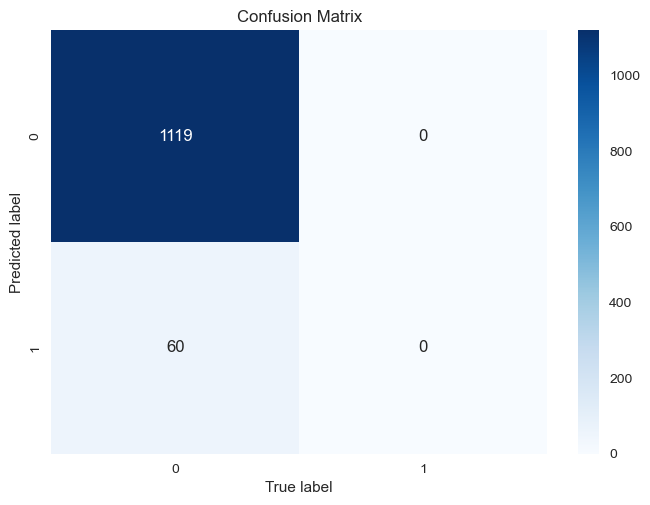

In [36]:
#Generating confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

True Negatives: 1119
False Positives: 0
False Negatives: 60
True Positives: 0

As we can see the accuracy of the model is quite high 94.91%, but from the confusion matrix could be seen that all the prediction is just negative, so I wouldn't recommend to use that model to predict stroke risk, because so far it's just gives us negative result. Deeper research need to be done to see the model prediction potential.

## Model 2: Linear Discriminant Analysis

In [37]:
# Instantiate the Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLinear = LinearDiscriminantAnalysis()
clfLinear

# Fit the model using training data
clfLinear.fit(X_train, y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [38]:
# Make a prediction using the testing data
clfpredict = clfLinear.predict(X_test)

In [39]:
#Generate accuracy score
accuracy_score(y_test, clfpredict)

0.9474130619168787

In [40]:
# Generate a confusion matrix for the model
cmLin = confusion_matrix(y_test, clfpredict)
display(cmLin)

array([[1110,    9],
       [  53,    7]])

In [41]:
#Generating classification report
print(classification_report(y_test, clfpredict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1119
           1       0.44      0.12      0.18        60

    accuracy                           0.95      1179
   macro avg       0.70      0.55      0.58      1179
weighted avg       0.93      0.95      0.93      1179



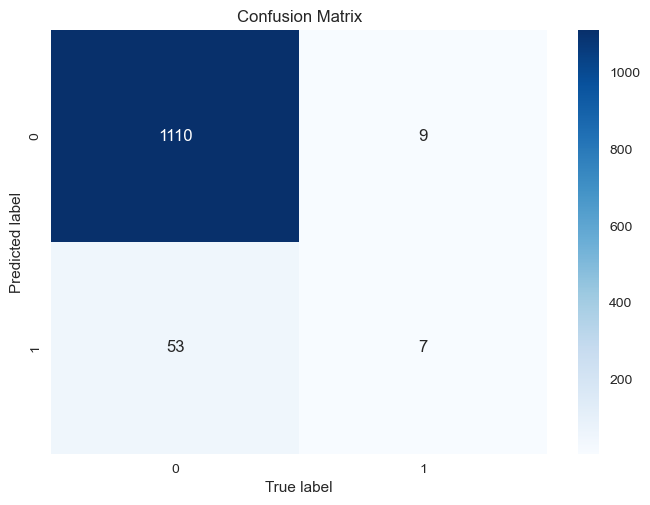

In [43]:
#Generating confusion matrix
conf_matrix = confusion_matrix(y_test, clfpredict)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

True Negatives: 1110
False Positives: 9
False Negatives: 53
True Positives: 7

As we can see the accuracy of the model is quite high 94.74%.

# Step 6
## Model comparison
As we can see above Dummy Classifier and Linear Discriminant Analysis gives us almost same accuracy score 94.91% vs 94.74%. But after discovering confusion matrix my suggestian is to use Linear Discriminant Analysis, because the prediction outcomes are more variacative, and Dummy Classifier model need deeper learing.